# Exercise 1.5 — Text Mining

In this exercise, we’ll analyze the text data collected from the *Key Events of the 20th Century* Wikipedia page (scraped in Exercise 1.4).  
We’ll explore it through tokenization, frequency distributions, and part-of-speech (POS) tagging to uncover key themes and entities.


In [ ]:
# Importing core libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from collections import Counter

# Downloading required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Loading the text file scraped in Exercise 1.4
with open('../Data/20th_century.txt', 'r', encoding='utf-8') as file:
    data = file.read().replace('\n', ' ')

print("Data loaded successfully. Text length:", len(data))


Data loaded successfully. Text length: 113010


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/boukaskasbrahim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/boukaskasbrahim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/boukaskasbrahim/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [5]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/boukaskasbrahim/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Sentence tokenization
tokenized_sent = sent_tokenize(data)
print(f"Number of sentences: {len(tokenized_sent)}")

# Word tokenization
tokenized_word = word_tokenize(data)
print(f"Number of words: {len(tokenized_word)}")

# Preview
print("First 30 tokens:", tokenized_word[:30])


Number of sentences: 1619
Number of words: 22286
First 30 tokens: ['Key', 'events', 'of', 'the', '20th', 'century', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'to', 'editCommunity']


In [ ]:
# Defining English stopwords
stop_words = set(stopwords.words("english"))

# Keeping only alphabetic words, lowercase, and removing stopwords
filtered_words = [
    word.lower() for word in tokenized_word
    if word.isalpha() and word.lower() not in stop_words
]

print("Total words after cleaning:", len(filtered_words))
print("Sample cleaned tokens:", filtered_words[:30])


Total words after cleaning: 9761
Sample cleaned tokens: ['key', 'events', 'century', 'wikipedia', 'jump', 'content', 'main', 'menu', 'main', 'menu', 'move', 'sidebar', 'hide', 'navigation', 'main', 'pagecontentscurrent', 'eventsrandom', 'articleabout', 'wikipediacontact', 'us', 'contribute', 'helplearn', 'editcommunity', 'portalrecent', 'changesupload', 'filespecial', 'pages', 'search', 'search', 'appearance']


In [ ]:
# Frequency distribution of cleaned tokens
from nltk.probability import FreqDist

fdist = FreqDist(filtered_words)

# Displaying top 15 most frequent words
print("Top 15 most common words:")
print(fdist.most_common(15))


Top 15 most common words:
[('december', 225), ('retrieved', 209), ('war', 207), ('world', 115), ('history', 71), ('soviet', 57), ('new', 54), ('first', 53), ('hitler', 51), ('century', 45), ('germany', 41), ('isbn', 40), ('battle', 39), ('nuclear', 38), ('would', 38)]


In [ ]:
# Removing reference-related words often found in Wikipedia citations
exclude_terms = {"retrieved", "isbn", "pdf", "archive", "url", "original", "web", "doi", "citation"}

filtered_words_refined = [w for w in filtered_words if w not in exclude_terms]

fdist_refined = FreqDist(filtered_words_refined)

print("Top 15 words (after removing citation terms):")
print(fdist_refined.most_common(15))


Top 15 words (after removing citation terms):
[('december', 225), ('war', 207), ('world', 115), ('history', 71), ('soviet', 57), ('new', 54), ('first', 53), ('hitler', 51), ('century', 45), ('germany', 41), ('battle', 39), ('nuclear', 38), ('would', 38), ('edit', 35), ('states', 33)]


In [11]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/boukaskasbrahim/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
# POS tagging
text_blob = TextBlob(' '.join(filtered_words_refined))
tags_list = text_blob.tags

# Creating a dataframe for analysis
df_tags = pd.DataFrame(tags_list, columns=['Word', 'POS'])
df_tags.head(10)


,Word,POS
0,key,JJ
1,events,NNS
2,century,NN
3,wikipedia,VBP
4,jump,NN
5,content,NN
6,main,JJ
7,menu,NN
8,main,JJ
9,menu,NN


/var/folders/fh/z04k5mcd3xz6ftdmhk_5j1m00000gn/T/ipykernel_78696/3117170926.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='POS Tag', data=pos_counts, palette='Blues_d')


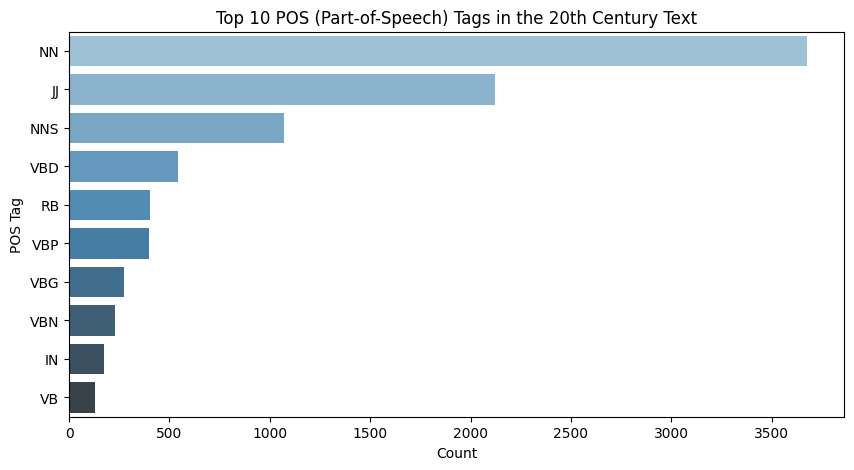

,POS Tag,Count
0,NN,3678
1,JJ,2120
2,NNS,1072
3,VBD,544
4,RB,402
5,VBP,399
6,VBG,274
7,VBN,229
8,IN,174
9,VB,130


In [ ]:
# Counting occurrences of each POS tag
pos_counts = df_tags['POS'].value_counts().nlargest(10).reset_index()
pos_counts.columns = ['POS Tag', 'Count']

# Ploting the top 10 POS tags
plt.figure(figsize=(10,5))
sns.barplot(x='Count', y='POS Tag', data=pos_counts, palette='Blues_d')
plt.title('Top 10 POS (Part-of-Speech) Tags in the 20th Century Text')
plt.show()

pos_counts


/var/folders/fh/z04k5mcd3xz6ftdmhk_5j1m00000gn/T/ipykernel_78696/766511559.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top15.values, y=top15.index, palette='crest')


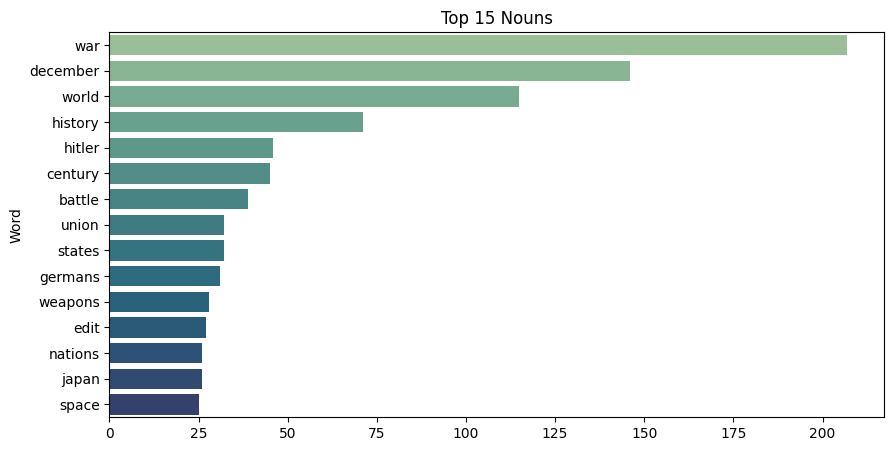

/var/folders/fh/z04k5mcd3xz6ftdmhk_5j1m00000gn/T/ipykernel_78696/766511559.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top15.values, y=top15.index, palette='crest')


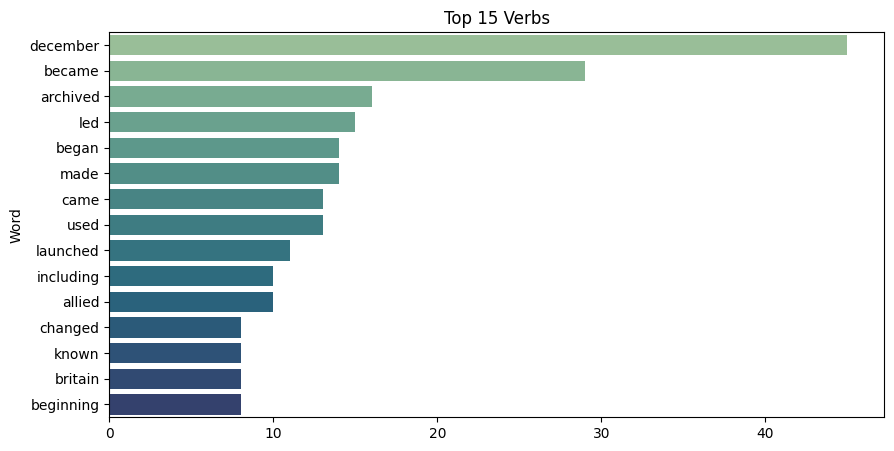

/var/folders/fh/z04k5mcd3xz6ftdmhk_5j1m00000gn/T/ipykernel_78696/766511559.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top15.values, y=top15.index, palette='crest')


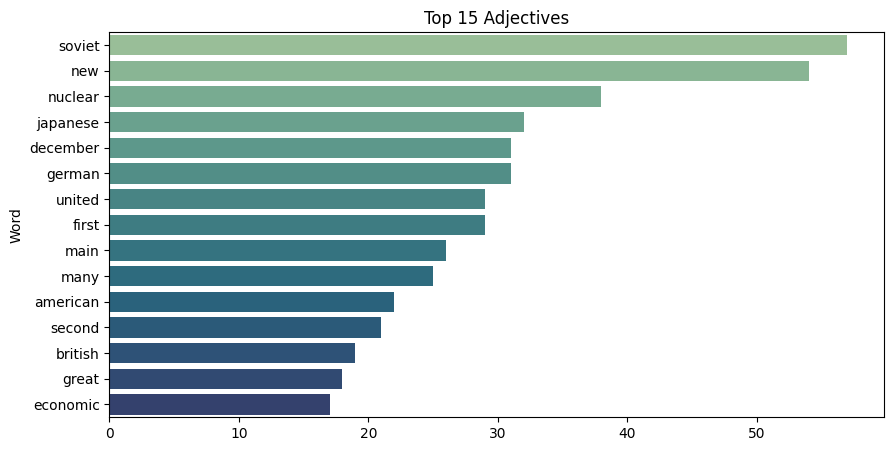

In [ ]:
# Separating by POS type
nouns = df_tags[df_tags['POS'].isin(['NN', 'NNS', 'NNP', 'NNPS'])]
verbs = df_tags[df_tags['POS'].str.startswith('VB')]
adjs = df_tags[df_tags['POS'].str.startswith('JJ')]

# Defining a function for plotting top words
def plot_top(df, title):
    top15 = df['Word'].value_counts().nlargest(15)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top15.values, y=top15.index, palette='crest')
    plt.title(title)
    plt.show()

# Ploting top 15 nouns, verbs, and adjectives
plot_top(nouns, "Top 15 Nouns")
plot_top(verbs, "Top 15 Verbs")
plot_top(adjs, "Top 15 Adjectives")


### POS Analysis Summary

The text is dominated by **nouns**, showing a strong focus on entities such as countries, leaders, and events.  
Frequent nouns like *war*, *germany*, and *soviet* confirm the text’s historical and geopolitical focus.  
Verbs highlight key actions (*began*, *declared*, *ended*), while adjectives describe impact and scale (*major*, *global*, *political*).  
This reinforces the article’s nature as a factual, event-driven historical summary of the 20th century.


In [6]:
# Load the text again
with open('../Data/20th_century.txt', 'r', encoding='utf-8') as file:
    data = file.read().replace('\n', ' ')


In [7]:
import re

clean_text = data
patterns_to_remove = [
    r'Jump to content', r'Main menu', r'Navigation', r'Create account', r'Log in', r'Donate',
    r'Search', r'Personal tools', r'Appearance', r'Wikipedia', r'Contact us', r'Help',
    r'Learn to edit', r'Community portal', r'Recent changes', r'Upload file', r'Special pages',
    r'Pages for', r'logged out editors', r'learn more', r'move to sidebar hide', r'ContributionsTalk',
    r'Toggle', r'Top', r'Tools', r'Actions', r'URLDownload', r'Download', r'Article', r'Portal',
    r'View history', r'Talk', r'Contents', r'print export', r'Languages', r'Page information'
]

for p in patterns_to_remove:
    clean_text = re.sub(p, ' ', clean_text, flags=re.IGNORECASE)

clean_text = re.sub(r'\[.*?\]', ' ', clean_text)
clean_text = re.sub(r'[^A-Za-z\s]', ' ', clean_text)
clean_text = re.sub(r'\s+', ' ', clean_text).strip()

print(clean_text[:500])


Key events of the th century Main page Current eventsRandom About Contribute Historic events in the th century Historic events in the th century subsection World at the beginning of the century The war to end all wars World War I Spanish flu Russian Revolution and communism Between the wars Economic depression The rise of dictatorship Global war World War II The war in Europe Blitzkrieg Operation Barbarossa Turning tides Operation Overlord Final days The war in the Pacific Background Japanese Ex


In [8]:
import spacy

# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

# Apply NER to the cleaned text
doc = nlp(clean_text)

# Extract all geopolitical entities
countries = [ent.text.strip() for ent in doc.ents if ent.label_ == "GPE"]

print("Sample countries:", countries[:20])
print("Total GPE mentions:", len(countries))


Sample countries: ['Sarajevo', 'Sarajevo', 'the Russian Empire', 'the German Empire', 'Russia', 'Germany', 'Russia', 'Germany', 'the Ottoman Empire', 'Ukraine', 'Germany', 'Germany', 'Yugoslavia', 'Czechoslovakia', 'Austro Hungarian Empire', 'the Soviet Union', 'the Soviet Union', 'Germany', 'Italy', 'Germany']
Total GPE mentions: 379


In [9]:
from collections import Counter
import pandas as pd

# Count occurrences of each geopolitical entity
country_counts = Counter(countries)

# Convert to DataFrame
df_countries = pd.DataFrame(country_counts.items(), columns=['Country', 'Count'])
df_countries = df_countries.sort_values(by='Count', ascending=False).reset_index(drop=True)

print(df_countries.head(10))
print("Unique country names detected:", len(df_countries))


             Country  Count
0              Japan     27
1            Germany     26
2   the Soviet Union     23
3            Britain     13
4  the United States     12
5             Poland     11
6             France     11
7              Italy      9
8             Berlin      8
9              India      8
Unique country names detected: 141


/var/folders/fh/z04k5mcd3xz6ftdmhk_5j1m00000gn/T/ipykernel_94529/229588245.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


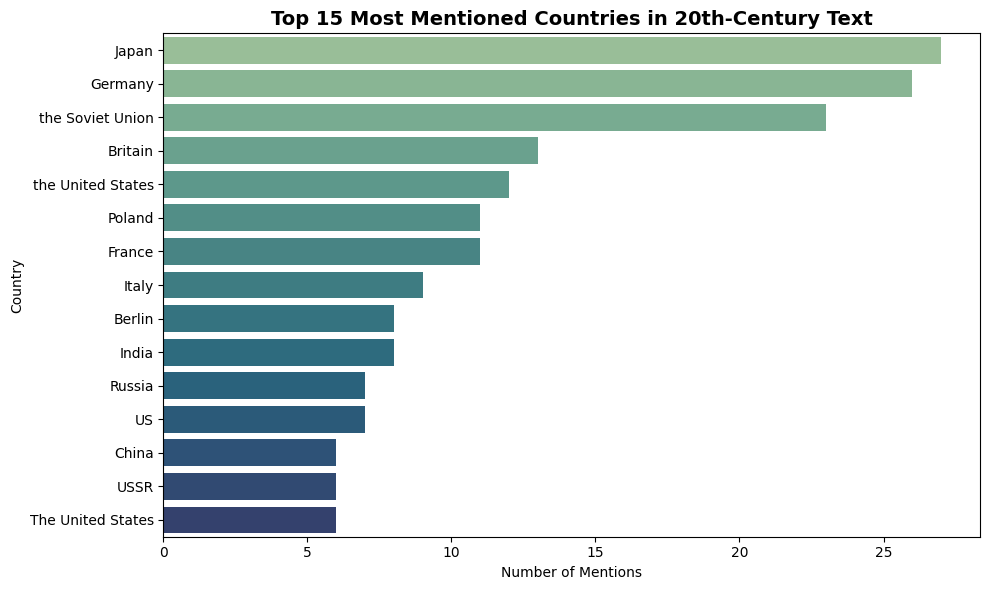

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(
    data=df_countries.head(15),
    x='Count',
    y='Country',
    palette='crest'
)
plt.title("Top 15 Most Mentioned Countries in 20th-Century Text", fontsize=14, weight='bold')
plt.xlabel("Number of Mentions")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig('../Img/Screenshots/country_mentions_barplot.png', dpi=300, bbox_inches='tight')
plt.show()


In [11]:
pip install plotly pycountry


  Using cached plotly-6.3.1-py3-none-any.whl.metadata (8.5 kB)
  Using cached narwhals-2.8.0-py3-none-any.whl.metadata (11 kB)
Using cached plotly-6.3.1-py3-none-any.whl (9.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 33.6 MB/s  0:00:00
Using cached narwhals-2.8.0-py3-none-any.whl (415 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [plotly]2m2/3 [plotly]s]
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import plotly.express as px
import pycountry

# Match country names to ISO codes
def get_country_code(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

df_countries['iso_alpha'] = df_countries['Country'].apply(get_country_code)
df_map = df_countries.dropna(subset=['iso_alpha'])

fig = px.choropleth(
    df_map,
    locations="iso_alpha",
    color="Count",
    hover_name="Country",
    color_continuous_scale="Blues",
    title="Country Mentions in 20th-Century Wikipedia Text"
)
fig.show()


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'Requirements/requirements_1.5.txt'
Note: you may need to restart the kernel to use updated packages.
